In [51]:
import numpy as np
import torch
import os
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision.models import swin_t, Swin_T_Weights

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [47]:

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
class cnnbio(Dataset):
    def __init__(self, root_dir, transforms = None):
        self.root_dir = root_dir
        self.img_dir = os.path.join(self.root_dir, "Images")
        self.labels_dir = os.path.join(self.root_dir, "label")
        self.samples = self.load_samples()
        self.transforms = transforms

    def load_samples(self):
        samples = [img.split('.')[0] for img in os.listdir(self.img_dir) if img.endswith(".jpg")]
        return samples
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        sample = self.samples[idx]
        image = Image.open(os.path.join(self.img_dir, sample + ".jpg"))
        with open(os.path.join(self.labels_dir, sample+'.txt')) as file:
            label = np.float32(file.read().split()[-4:])
            
        if self.transforms:
            img_tensor = self.transforms(image)
        else:
            img_tensor = torch.from_numpy(np.float32(image)).unsqueeze(0)
        return img_tensor, label



torch.Size([100, 3, 300, 300])


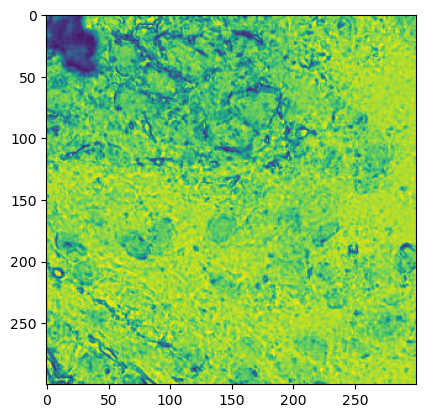

In [48]:
train_dir = '/GILMLab/GILMLabProjects/DeepLearning/deepquantification/data/cnnbio/cnnbio_ssd_7_10/cnnbio_ssd_train'
train_dataset = cnnbio(train_dir, transform)
train_dataloader = DataLoader(train_dataset, batch_size = 100, shuffle = True)
sample = next(iter(train_dataloader))
print(sample[0].shape)
plt.imshow(sample[0][0][0])

In [52]:
class SwinT(nn.Module):
    def __init__(self):
        super(SwinT, self).__init__()
        self.model1 = swin_t(weights = Swin_T_Weights.IMAGENET1K_V1)
        
        self.fc1 = nn.Linear(1000, 4)
    def forward(self, x):
        x = self.model1(x)
        x = self.fc1(x)
        return x

In [ ]:
model = SwinT()